# Machine Learning Assignment 2

The assignment 2 contains 3 questions and the due date is May 1 (Monday) 23:59PM.

## Question 1 Image Compression

In this question, you will work with images and apply KMeans for image compression, by reducing the number of colours that occur in an image to only those that are most common in that image.


### Question 1.1 (0 points)

To let you learn how Python work with images, plese complete this question.

### Black & white images

Each images represent a matrix where each pixel is an element of this matrix 
<img src="https://miro.medium.com/max/1386/1*bV7S0zACdidh11ikjYpLpQ.png">
The scale of colors is between 0 and 255 : 0 correspond to black and 255 to white

### Colored images
<img src="https://miro.medium.com/max/840/1*y0nV4cWk3KbzXSe9dIWL5g.jpeg">

Every color is a linear combinaison of primary colors : Red Green Blue <br/>
A colored image is somehow just the supperposition of three images : for each pixel with have three values




### Download images

We are using the famous [The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) that consists of 60000 32x32 color images in 10 classes, with 6000 images per class. We need to donwload this dataset from tensorflow. If you have not installed tensorflow, please follow the [instllation guide](https://www.tensorflow.org/install) to get it or simply use Google colab for this assignment.




In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 10s 0us/step


By checking the shape, you will find the train set contains 50,000 images with the shape of (32, 32, 3) that indicates the image resolution with 3 color channels.

In [4]:
x_train.shape

(50000, 32, 32, 3)

You can visually check a random image:

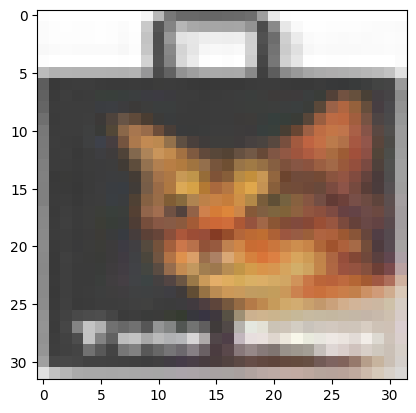

In [5]:
plt.imshow(x_train[3000])

We can also check the image at each of three channels:

In [ ]:
plt.imshow(x_train[3000][:, :, 0])

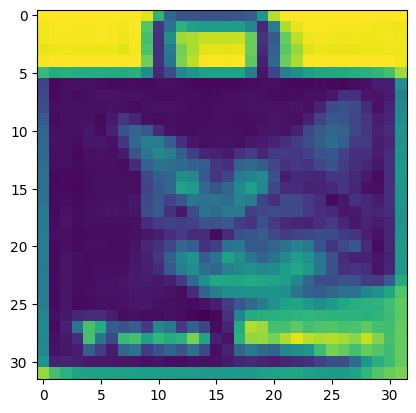

In [18]:
plt.imshow(x_train[3000][:, :, 1])

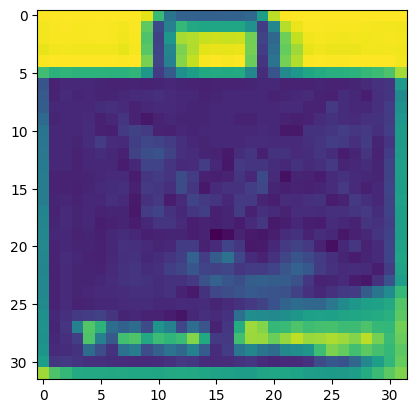

In [19]:
plt.imshow(x_train[3000][:, :, 2])

We can convert a color image as a greyscale image using the NTSC formula: 0.299 ∙ Red + 0.587 ∙ Green + 0.114 ∙ Blue. This formula closely represents the average person's relative perception of the brightness of red, green, and blue light.

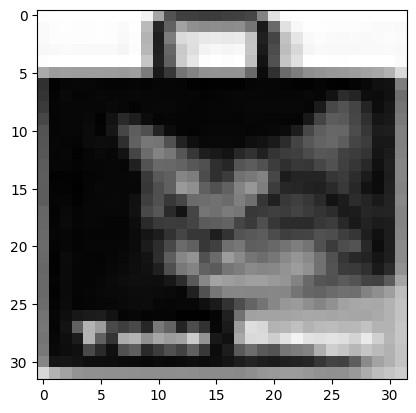

In [7]:
R, G, B = x_train[3000][:,:,0], x_train[3000][:,:,1], x_train[3000][:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(imgGray, cmap='gray')

### Question 1.2 (10 points)

Convert all color images in x_train into greyscale images and use the sklearn.decomposition.PCA to perform principal component analysis to the dataset to reduce dimensions to 256. Then, reconstruct images from its reduced representation. Choose a image and see how it goes before and after the PCA using imread method. Explain your findings.  

**Hint** You may need to use numpy's reshape method to change the representation of each image as a vector before performing PCA and reshape it back as an image before you are able to visualize it.

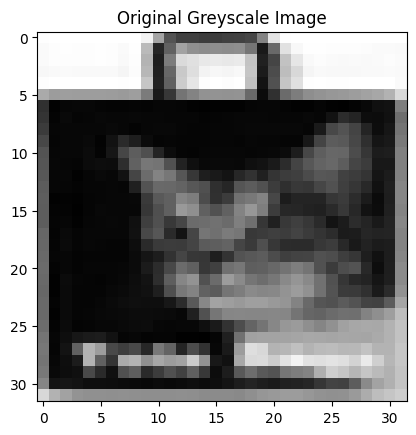

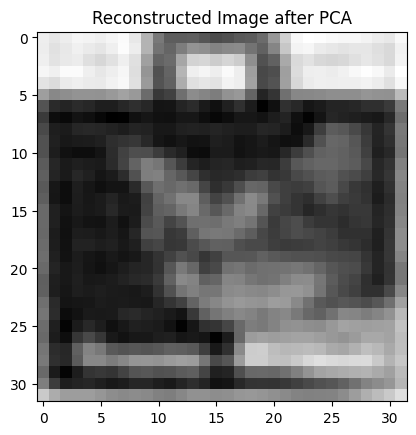

In [21]:
from sklearn.decomposition import PCA

# Convert images to greyscale
def rgb2gray(images):
    return np.dot(images[..., :3], [0.2989, 0.5870, 0.1140])

x_train_gray = rgb2gray(x_train)

# Reshape images to vectors
x_train_gray_vectors = x_train_gray.reshape(x_train_gray.shape[0], -1)

# Perform PCA to reduce dimensions to 256
pca = PCA(n_components=256)
x_train_pca = pca.fit_transform(x_train_gray_vectors)

# Reconstruct images from the reduced representation
x_train_reconstructed = pca.inverse_transform(x_train_pca)

# Reshape the reconstructed vectors back to images
x_train_reconstructed_images = x_train_reconstructed.reshape(x_train_gray.shape)

# Choose an image (e.g. here 3000 as before) and visualize it before and after PCA
index = 3000

# Original greyscale image
plt.imshow(x_train_gray[index], cmap='gray')
plt.title("Original Greyscale Image")
plt.show()

# Reconstructed image after PCA
plt.imshow(x_train_reconstructed_images[index], cmap='gray')
plt.title("Reconstructed Image after PCA")
plt.show()

**Explanation:** 

After performing PCA and visualizing the images, you will observe that the reconstructed image looks similar to the original greyscale image, but with some loss of detail. This is because PCA is a linear dimensionality reduction technique that tries to preserve the maximum amount of variance in the data while reducing the number of dimensions. In this case, the number of dimensions was reduced to 256, which is a significant reduction from the original 32x32=1024 pixels. As a result, some information is lost in the process, which is reflected in the loss of detail in the reconstructed image. However, the overall structure and main features of the image are still preserved, which makes PCA a useful technique for dimensionality reduction, especially for tasks such as image compression or speeding up machine learning algorithms.

### Question 1.3 (10 points)

Now explain which number of principal components should be chosen using Elbow method if PCA reaches 90% threshold of explained variance. Use the obtained number of principal components to reduce the image dimensions and again compare the reconstructed images from the previous step. Expalin your findings.

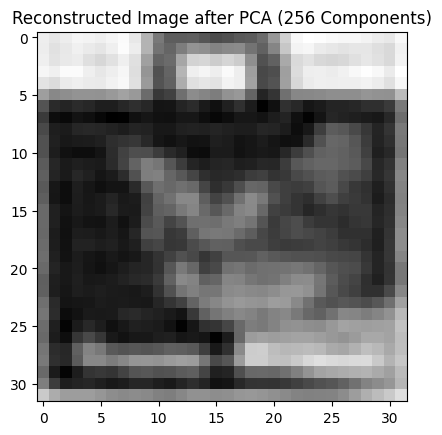

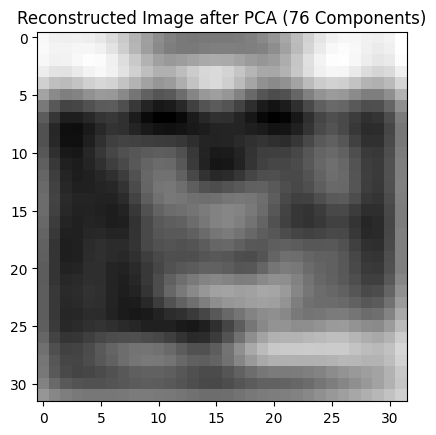

In [25]:
# Fit PCA without specifying the number of components
pca_full = PCA()
x_train_pca_full = pca_full.fit_transform(x_train_gray_vectors)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find the number of components that reach a 90% threshold
n_components_90 = np.argmax(cumulative_explained_variance >= 0.9) + 1

# Perform PCA with the optimal number of components
pca_90 = PCA(n_components=n_components_90)
x_train_pca_90 = pca_90.fit_transform(x_train_gray_vectors)
x_train_reconstructed_90 = pca_90.inverse_transform(x_train_pca_90)
x_train_reconstructed_images_90 = x_train_reconstructed_90.reshape(x_train_gray.shape)

# Compare the reconstructed images from the previous step
# Reconstructed image after PCA with 256 components
plt.imshow(x_train_reconstructed_images[index], cmap='gray')
plt.title("Reconstructed Image after PCA (256 Components)")
plt.show()

# Reconstructed image after PCA with the optimal number of components
plt.imshow(x_train_reconstructed_images_90[index], cmap='gray')
plt.title(f"Reconstructed Image after PCA ({n_components_90} Components)")
plt.show()

**Explanation:**

The reconstructed image using 76 components is more blurred than the one using 256 components. This is because using fewer components retains less information from the original image, leading to a loss of detail and increased blurriness. When you use only 76 components, you're compressing the image more aggressively, preserving only 90% of the explained variance. The increase in blurriness is the trade-off you make for this higher compression rate. The reconstruction with 256 components, while still compressed compared to the original image, retains more information and thus results in a less blurred image.

It's essential to consider the balance between the number of components and the reconstruction quality depending on the specific requirements of the task at hand. If the goal is to minimize storage or computation requirements, using fewer components (e.g. 76 components here) could be beneficial despite the loss of detail. However, if the goal is to preserve image quality for tasks such as object recognition, using a higher number of components (e.g. 256 components) might be more appropriate.

### Question 1.4 (10 points)

Now build an image classifier of Logistic Regression (with default configuration) to predict the class of images using the original greyscale images and the compressed representations from PCA that explains 90% of variance. Use the 5-fold cross-validation to report the average macro-f1 test score (given this is a balanced dataset) and total fit time. Explain your findings.

Hint: y_train contains the uint8 value and cross-validate would not consider it as the label for classification. You need to convert the y_train into categorical values such that cross-validate would perform multi-class classification.

In [26]:
# Prepare the data by converting the labels to int and reshaping the original greyscale images to vectors
y_train_int = y_train.astype(int).ravel()
x_train_gray_vectors = x_train_gray.reshape(x_train_gray.shape[0], -1)

# Perform PCA with 76 components (90% explained variance) on the greyscale image vectors
pca_90 = PCA(n_components=n_components_90)
x_train_pca_90 = pca_90.fit_transform(x_train_gray_vectors)

# Create a Logistic Regression classifier with default configuration
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

# Use 5-fold cross-validation to report the average macro-f1 test score and total fit time for both original and compressed data
from sklearn.model_selection import cross_validate
import time

# Original greyscale images
start_time = time.time()
cv_results_original = cross_validate(clf, x_train_gray_vectors, y_train_int, cv=5, scoring='f1_macro', n_jobs=-1)
fit_time_original = time.time() - start_time
average_f1_original = np.mean(cv_results_original['test_score'])

# Compressed representations from PCA (90% explained variance)
start_time = time.time()
cv_results_pca = cross_validate(clf, x_train_pca_90, y_train_int, cv=5, scoring='f1_macro', n_jobs=-1)
fit_time_pca = time.time() - start_time
average_f1_pca = np.mean(cv_results_pca['test_score'])

print(f"Original Greyscale Images: Average Macro F1 = {average_f1_original:.4f}, Total Fit Time = {fit_time_original:.2f} seconds")
print(f"PCA Compressed Images: Average Macro F1 = {average_f1_pca:.4f}, Total Fit Time = {fit_time_pca:.2f} seconds")

Original Greyscale Images: Average Macro F1 = 0.2772, Total Fit Time = 64.48 seconds
PCA Compressed Images: Average Macro F1 = 0.2876, Total Fit Time = 9.23 seconds


**Explanation:**

You should observe that the average macro-f1 test score for the original greyscale images is slightly higher than the one of the PCA compressed images (90% explained variance). This is because the original images contain more information, allowing the classifier to make better predictions.
However, the total fit time for the PCA compressed images is significantly lower than the original greyscale images. This is because PCA reduces the dimensionality of the data, leading to faster training times for the classifier.
These results show the trade-off between model performance and training time. Using PCA compressed images can speed up the training process, but may result in slightly lower classification performance.

It is important to mention that the exact results may vary due to the random nature of the logistic regression classifier and cross-validation.

### Question 1.5 (15 points)

Now let's work with the color images (with 3 channels) and again compress one image, this time by reducing numbers of colors using K-means. You need to cluster pixel values into **32 clusters** and choose the "mean color" to replace all the pixels in each cluster by this mean color. Show the original color image of cat and the mean color image of the same one. Explain your findings. 

Hint: each color pixel is represented by a 3D (R,G,B) vector, and the image would have 32x32 pixels. So you could find the mean color from the centroids of 32 clusters and update the pixels of image with the mean color.

Hint2: Once you have replaced the pixel values with mean color, you need to explicitly convert it into **uint type** such s uint8, uint16, etc, because the image pixel values can only be represented as integers or fractions.

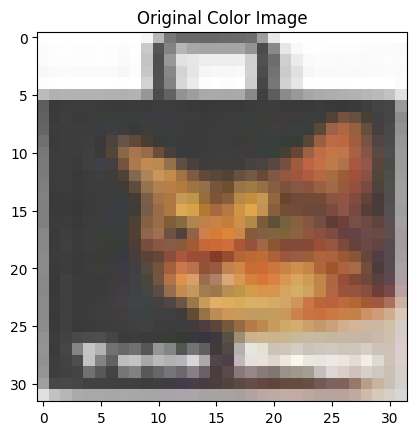

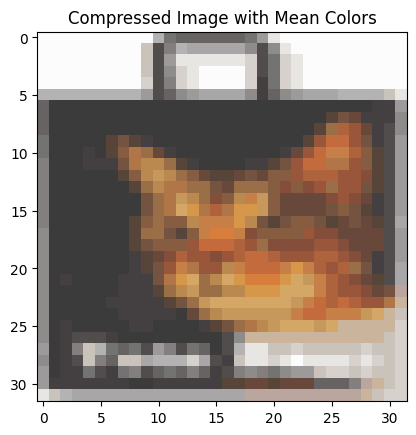

In [32]:
# Choose an image (e.g., a cat image) and reshape it to a 2D array where each row represents a pixel with 3 color channels
cat_image = x_train[3000]
pixels = cat_image.reshape(-1, 3)

# Perform K-means clustering with 32 clusters on the pixel values
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=32)
kmeans.fit(pixels)

# Replace each pixel value with the mean color of the corresponding cluster (centroid)
compressed_pixels = kmeans.cluster_centers_[kmeans.labels_].astype('uint8')

# Reshape the compressed pixel values back to the original image shape
compressed_cat_image = compressed_pixels.reshape(cat_image.shape)

# Visualize the original color image and the compressed image
# Original color image
plt.imshow(cat_image)
plt.title("Original Color Image")
plt.show()

# Compressed image with mean colors
plt.imshow(compressed_cat_image)
plt.title("Compressed Image with Mean Colors")
plt.show()

**Explanation:**

The compressed image using mean colors from K-means clustering has fewer distinct colors (32) compared to the original color image.
This compression reduces the complexity of the image, which can lead to a more efficient representation in terms of memory and computation.
Despite the reduction in the number of colors, the overall structure and main features of the image are still preserved. This indicates that K-means clustering can be a useful technique for image compression, especially when it's important to retain the overall appearance of the image while reducing its complexity.

## Question 2 Nova SBE Wikipedia 


In this question, you will work with time-series forecasting of page views of [Nova SBE's Wikipedia page](https://en.wikipedia.org/wiki/Nova_School_of_Business_and_Economics)  

When you click 'View history', you should see the backend of the wiki page and you can further select 'Pageviews' to have the statistics of page views of this page. Let's select the page views from all times (July 2015 to April 2023) at monthly level from users only (we exclude robot/spider views) and here is the [link](https://pageviews.wmcloud.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&start=2015-07&end=2022-07&pages=Nova_School_of_Business_and_Economics) that allows you to get it directly. You can choose to download the data as csv or JSON file to work on.


In [34]:
pageview = pd.read_csv('pageviews-20150701-20230331.csv')
pageview

FileNotFoundError: ignored

In [ ]:
pageview['Date'] = pd.to_datetime(pageview['Date'])
pageview.set_index('Date', inplace=True)

<AxesSubplot:xlabel='Date'>

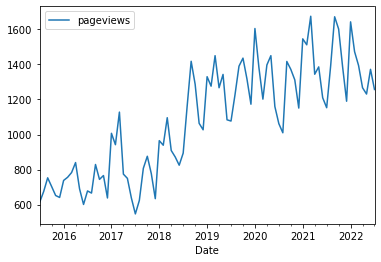

In [ ]:
pageview.rename(columns={'Nova School of Business and Economics':'pageviews'}, inplace=True)
pageview.plot()

### Question 2.1 Ensure Stationarity (10 points)

We will perform time-series forecasting and we need to ensure stationarity first. Perform [`Augmented Dick Fuller test`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html)and explain whether the pageview of wiki pages is stationary and would you be able to stationarize the data through first-order and second-order differencing (you can check the p-value and see if you achieve the statistical significance)?

Alternatively, you could also stationarize the pageview time series through deseasonlization. Perform seasonal decomposition using additive or multiplicative methods and explain whether you would achieve stationary time-series through seasonal decomposition?


### Question 2.2 Identify the hyperparameter (10 points)

Using the method from the previous section, we will preprocess the time series by deseasonalizing it (either additive or multiplicative) and identify the optimal hyperparameter of (p,d,q) for ARIMA model. Explain how would you find these hyperparameters. You could consider plotting autocorrelation and partial autocorrelation functions. 

### Question 2.3 Fit and forecast (10 points)

Now let's fit the ARIMA model using the identified hyperparameter of (p,d,q). Let's use the first 80% observations as the train set and remaining 20% observations as the test set 

Once you fit the model on the train set, you can make the forecast on the test set. Use the provided plot_forecast function to visulize the forecasted values and real values (together with 95% confidence interval). 

Lastly, report the mean absolute percentage error on the test set (you can use the sklearn implementation).

Hint: do not forget to add back the seasonality component to reconstruct the original pageview

## Question 3 Birds of a feather sing together


In this question, you will work with movie ratings to build a recommender system just like Netflix, Youtube, etc.


__Load the datasets in three different pandas dataframes `movies`, `tags` and `ratings`.__


In [ ]:
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
ratings = pd.read_csv('ratings.csv')


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Let's filter the ratings dataframe, to have only movies that have received a rating:

In [ ]:
movies['genres'] = movies['genres'].str.replace('|',' ')
movies = movies[movies.movieId.isin(ratings.movieId.unique().tolist())]
movies.shape

(9724, 3)

### Question 3.1 (10 points) Content-based recommender system

We create a new feature called metadata, that merges all the text data information we have about a movie : the genre and the tags. So the merged dataframe should contain at least the following columns: *movieId, title and metadata*.

Then, construct the vectorized reprentation of metadata using sklearn's Countvectorizer to transform the metadata into vectors. Learn the latent matrix from the metadata vector using [truncated SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) with 50 dimensions. With the generated latent matrix, identify the top 10 most relevant movies for **"Toy Story (1995)"** by calculating the cosine similairty and finding movies with the highest similarity score. 



### Question 3.2 (10 points) Collaborative filtering recommender system

Similarly, let's creat a latent matrix for ratings and also show the top 10 most relevant movies that receive similar ratings. 




### Question 3.3 (5 points) Hybrid recommender system

Similarly, let's build a hybrid recommender system and also show the top 10 most relevant movies that calculate the average measure of both content and collaborative.
